In [32]:
import numpy as np
import pandas as pd
import os
from matplotlib import pyplot as plt

In [33]:
data_dir = "../data/clean_tac/"
list_dir = os.listdir(data_dir)
# clean_tac2 = pd.read_csv("../data/clean_tac/CC6740_clean_TAC.csv")

## USING TAC READINGS

In [43]:
tacs = {}
for pid_csv in list_dir:
    pid = pid_csv[:6]
    tacs[pid] = pd.read_csv(data_dir+pid_csv)

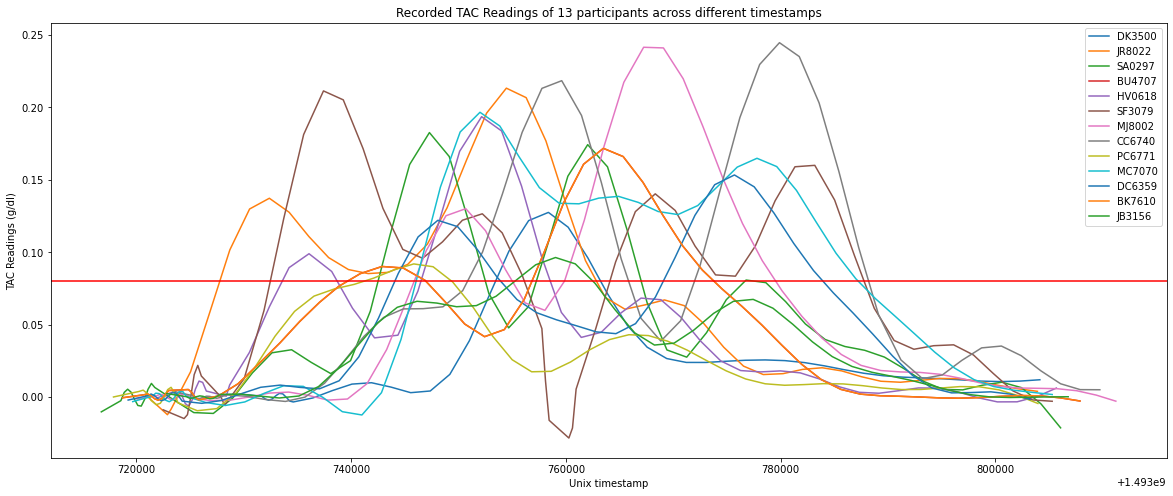

In [76]:
plt.figure(figsize=(20,8))
for _,pid in enumerate(tacs):
    tac_values = tacs[pid]
    plt.plot(tac_values['timestamp'],tac_values['TAC_Reading'])

plt.axhline(y=0.08, color='r', linestyle='-')
plt.xlabel("Unix timestamp")
plt.ylabel("TAC Readings (g/dl)")
plt.title("Recorded TAC Readings of 13 participants across different timestamps")
plt.legend(list(tacs.keys()))

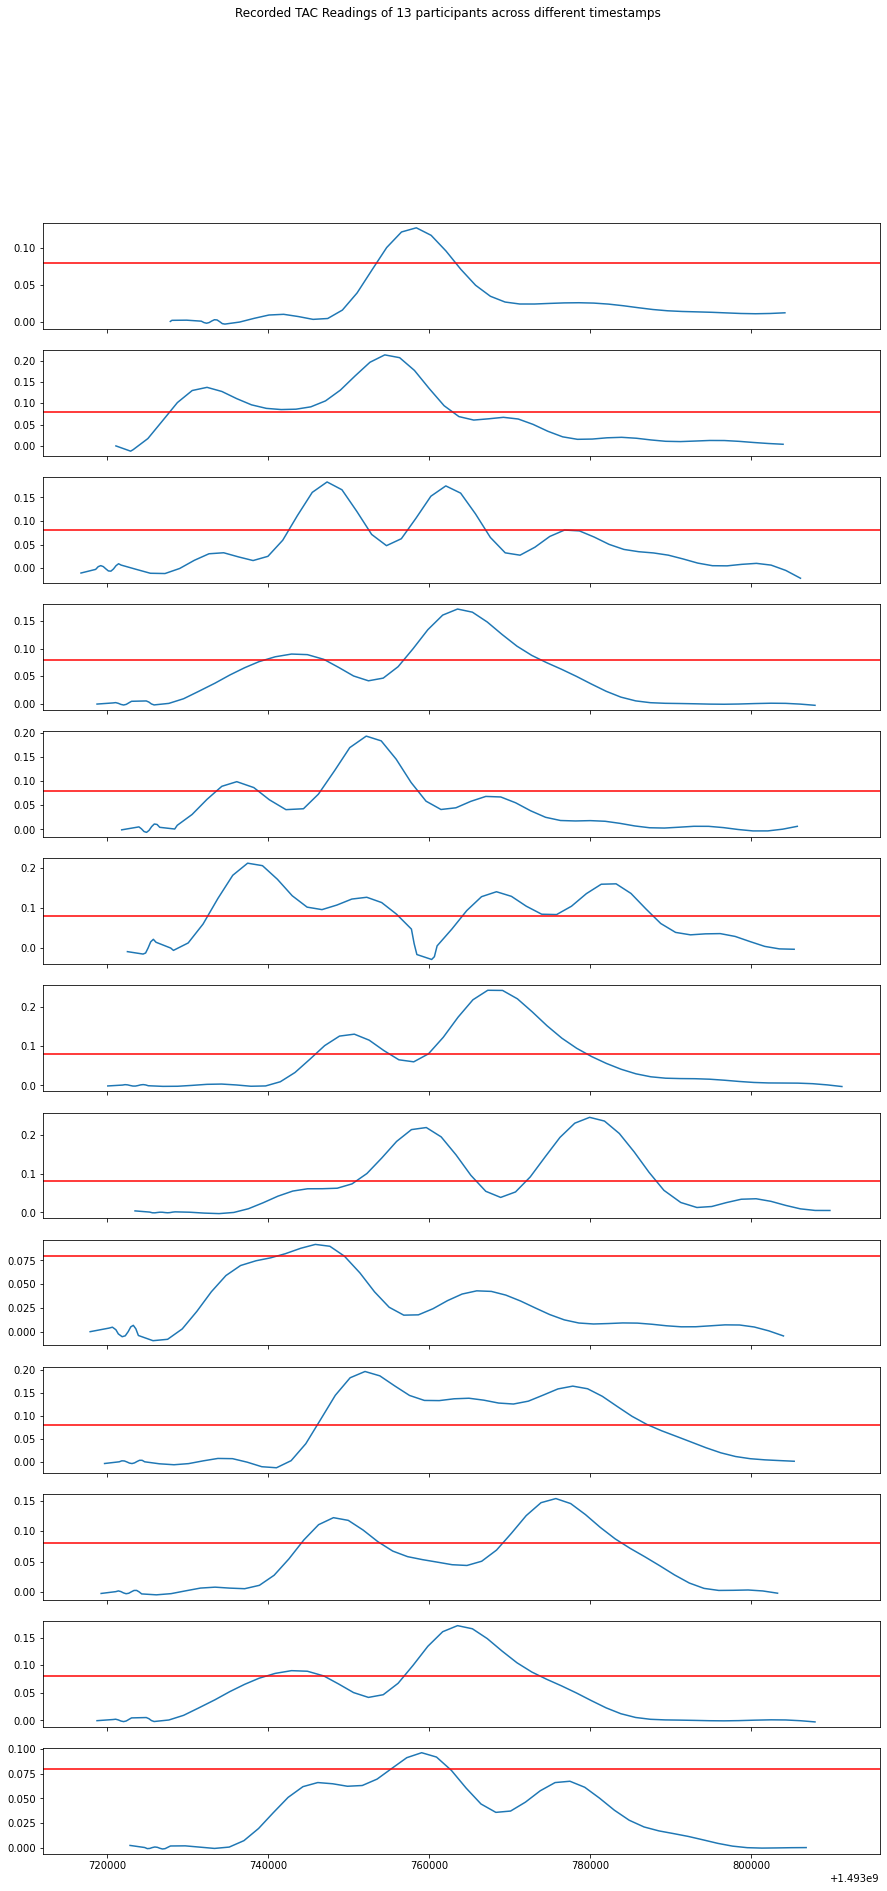

In [88]:

fig, axs = plt.subplots(13,figsize=(15,30), sharex=True)
fig.suptitle('Recorded TAC Readings of 13 participants across different timestamps')

for i,pid in enumerate(tacs):
    tac_values = tacs[pid]
    axs[i].plot(tac_values['timestamp'],tac_values['TAC_Reading'])
    axs[i].axhline(y=0.08, color='r', linestyle='-')


## USING ACCELEROMETER DATA

In [89]:
data_dir = "../data/all_accelerometer_data_pids_13.csv"
acc_data = pd.read_csv(data_dir)

In [90]:
acc_data.shape

(14057567, 5)

In [91]:
acc_data.head

<bound method NDFrame.head of                    time     pid         x         y         z
0                     0  JB3156  0.000000  0.000000  0.000000
1                     0  CC6740  0.000000  0.000000  0.000000
2         1493733882409  SA0297  0.075800  0.027300 -0.010200
3         1493733882455  SA0297 -0.035900  0.079400  0.003700
4         1493733882500  SA0297 -0.242700 -0.086100 -0.016300
...                 ...     ...       ...       ...       ...
14057562  1493829248196  CC6740 -0.133956  0.124726 -0.010736
14057563  1493829248220  CC6740 -0.100764  0.180872  0.046449
14057564  1493829248245  CC6740 -0.131853  0.195934  0.181088
14057565  1493829248270  CC6740 -0.149704  0.194482  0.202393
14057566  1493829248294  CC6740 -0.107288  0.153548  0.168595

[14057567 rows x 5 columns]>

## Create a dictionary of accelerometer data where the key is each pid

In [110]:
tacs.keys()

dict_keys(['DK3500', 'JR8022', 'SA0297', 'BU4707', 'HV0618', 'SF3079', 'MJ8002', 'CC6740', 'PC6771', 'MC7070', 'DC6359', 'BK7610', 'JB3156'])

In [121]:
pid_acc_data={}
pids = list(tacs.keys())
for pid in pids:
    pid_acc_data[pid] = acc_data[acc_data['pid']==pid]


### Plot a combination of accelerometer data with TAC reading for each participant

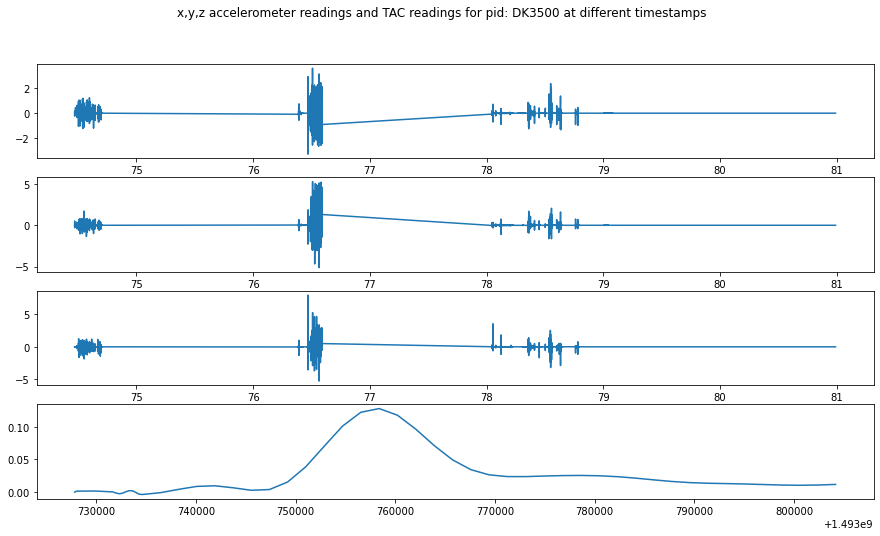

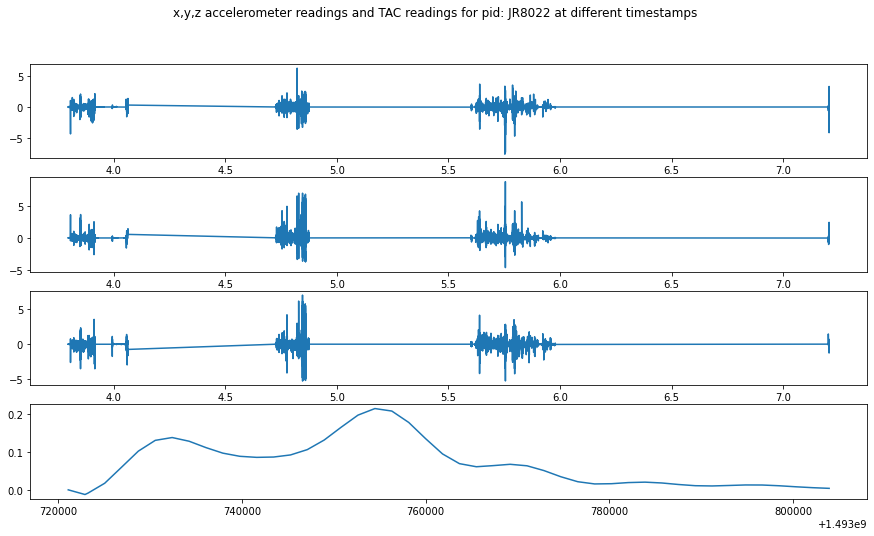

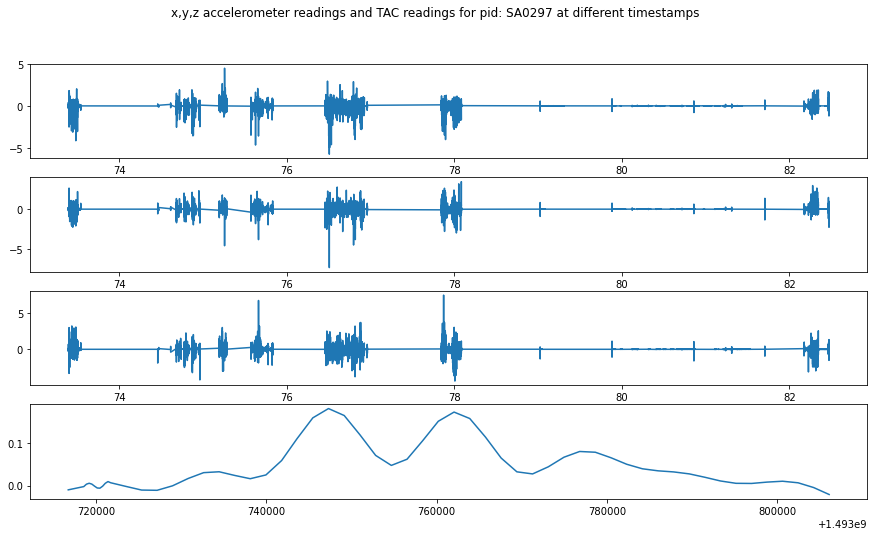

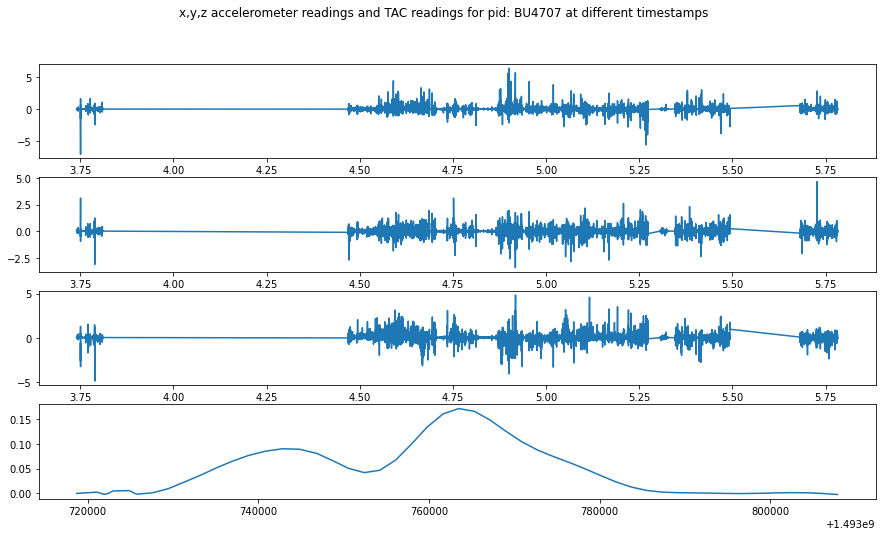

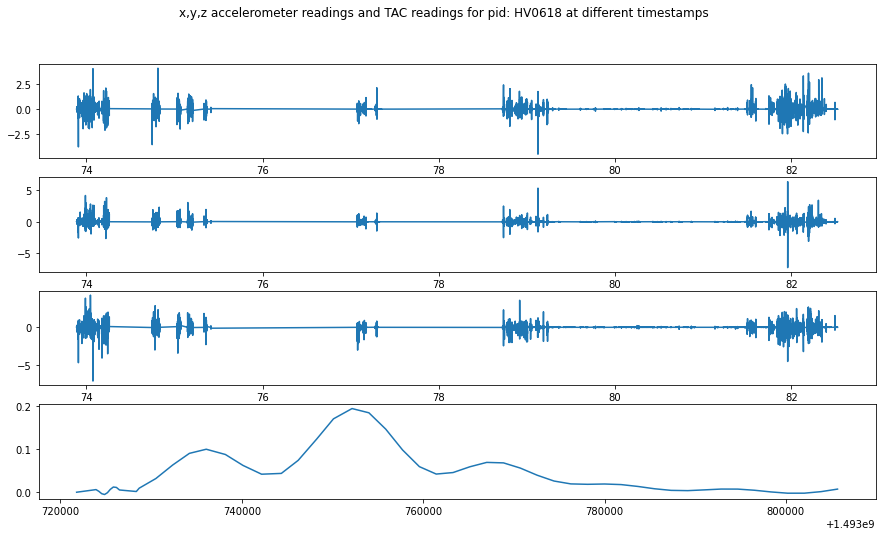

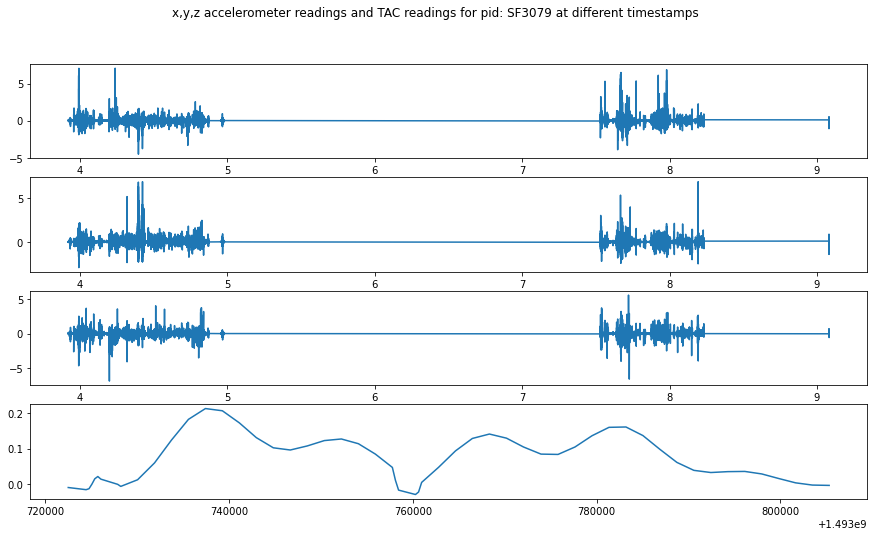

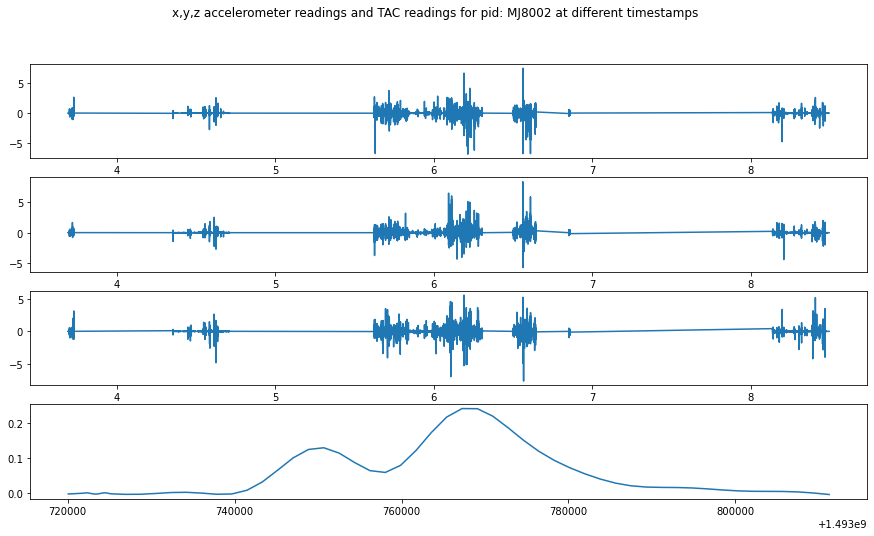

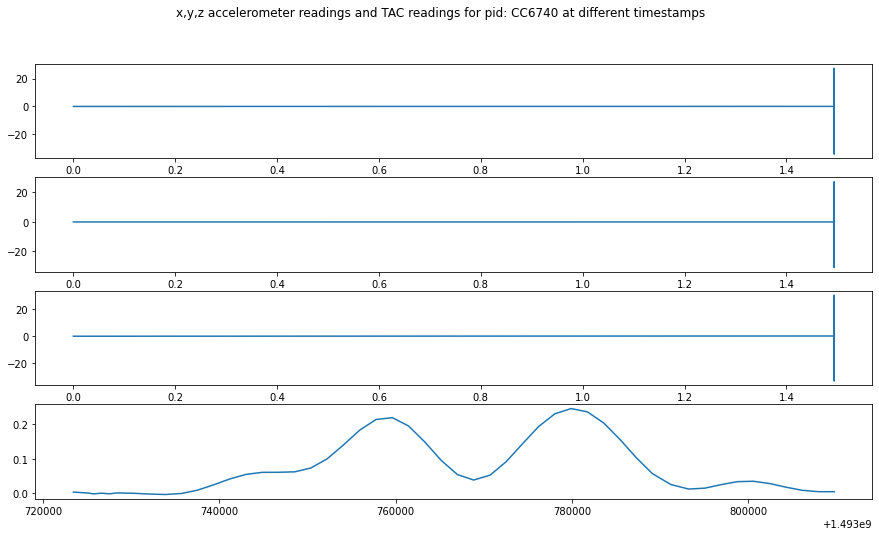

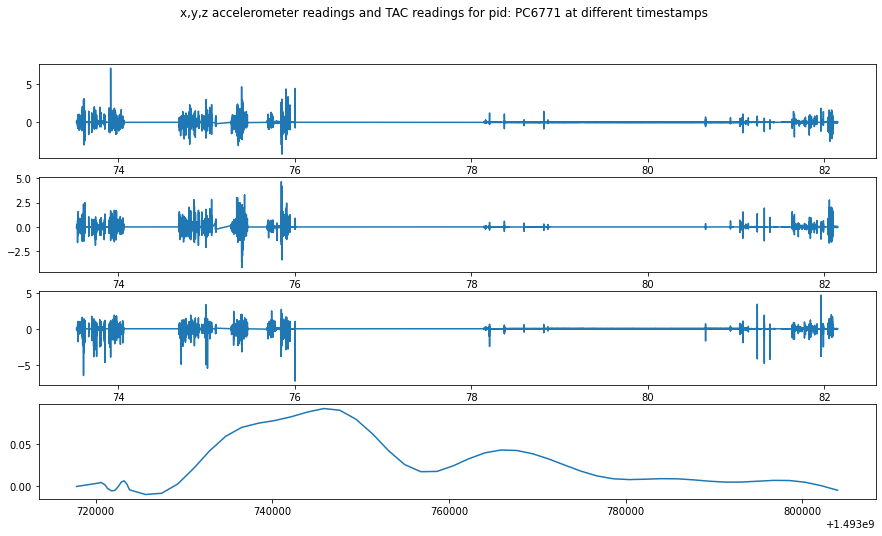

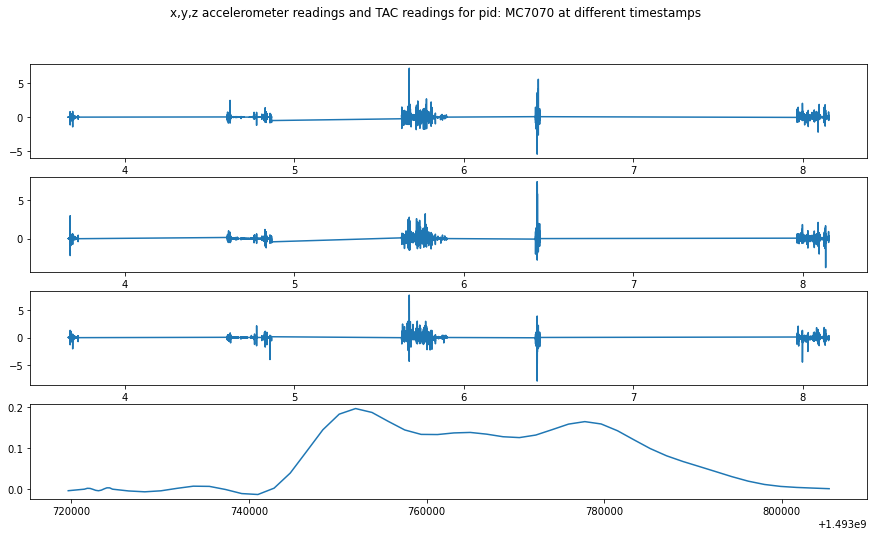

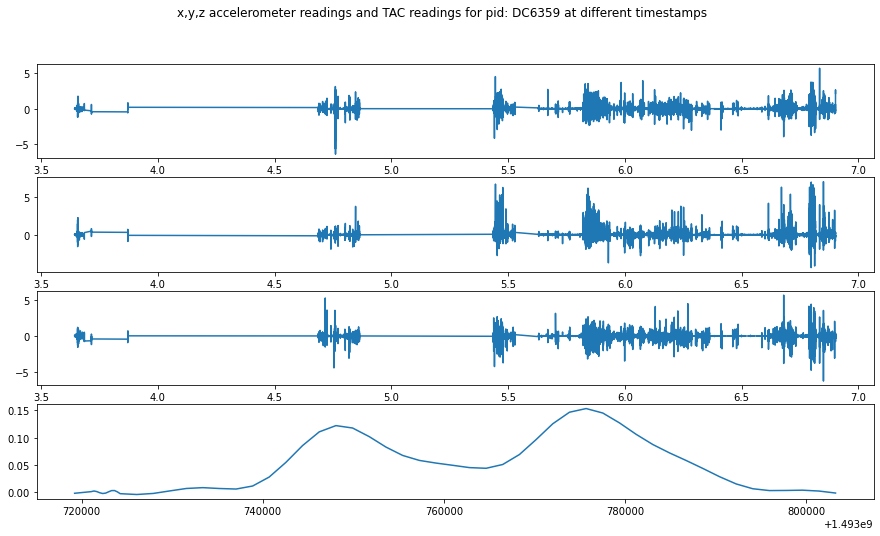

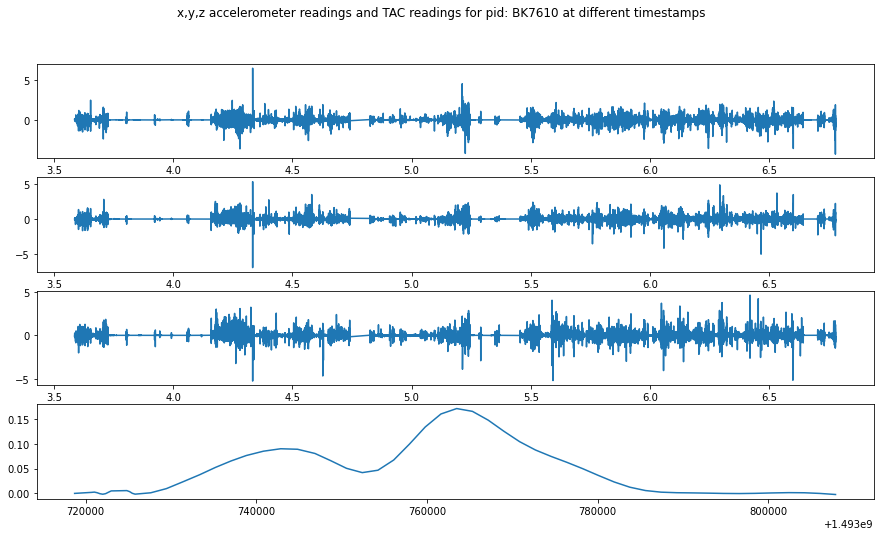

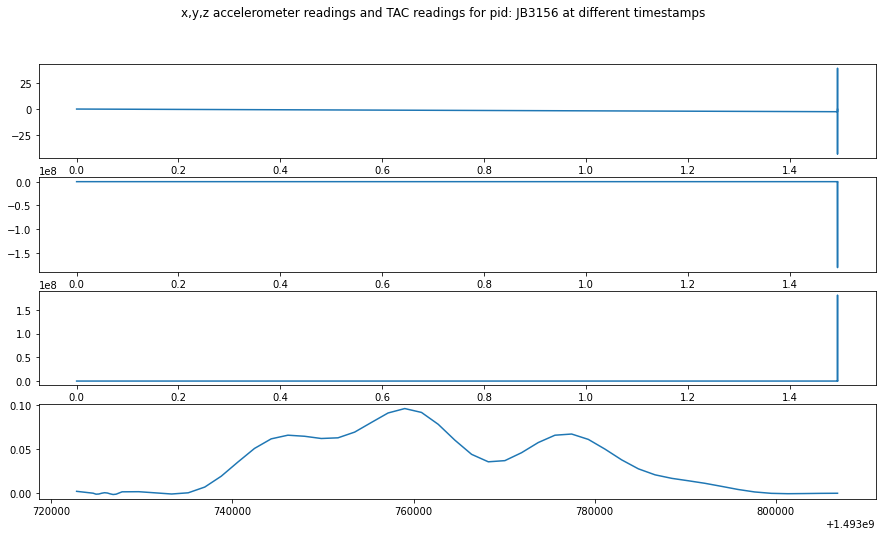

In [138]:
for pid in pids:
    fig, axs = plt.subplots(4,figsize=(15,8))
    fig.suptitle(f'x,y,z accelerometer readings and TAC readings for pid: {pid} at different timestamps')

    axs[0].plot(pid_acc_data[pid]['time'], pid_acc_data[pid]['x'])
    axs[1].plot(pid_acc_data[pid]['time'], pid_acc_data[pid]['y'])
    axs[2].plot(pid_acc_data[pid]['time'], pid_acc_data[pid]['z'])
    axs[3].plot(tacs[pid]['timestamp'], tacs[pid]['TAC_Reading'])

## Example on random pid

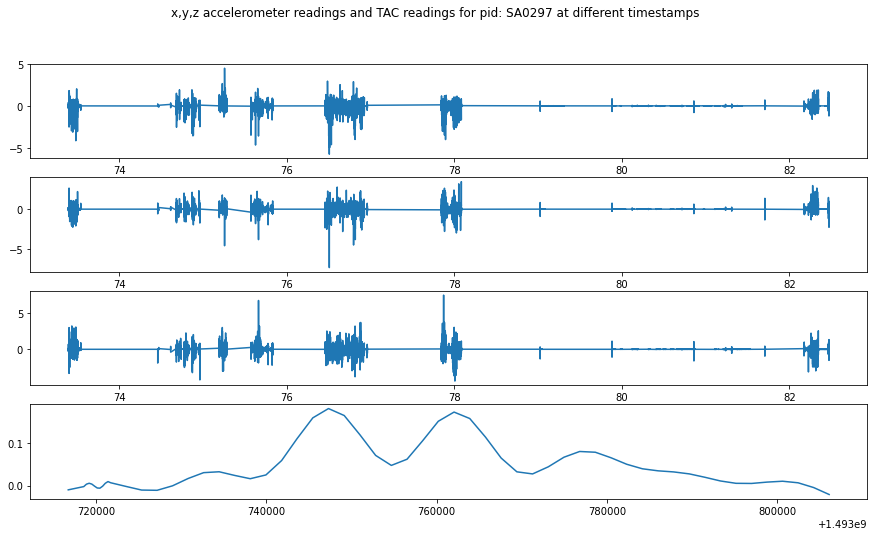

In [136]:
pid = 'SA0297'
fig, axs = plt.subplots(4,figsize=(15,8))
fig.suptitle(f'x,y,z accelerometer readings and TAC readings for pid: {pid} at different timestamps')

axs[0].plot(pid_acc_data[pid]['time'], pid_acc_data[pid]['x'])
axs[1].plot(pid_acc_data[pid]['time'], pid_acc_data[pid]['y'])
axs[2].plot(pid_acc_data[pid]['time'], pid_acc_data[pid]['z'])
axs[3].plot(tacs[pid]['timestamp'], tacs[pid]['TAC_Reading'])
